# First Lab: Heart Disease Prediction
### Groupmate: Ziyun Zhou, Zheyan Li, Ge Li

## Data Preprocessing

In [22]:
# import all the packges we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#PCA
from sklearn.decomposition import PCA
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.palettes import Spectral10, Category20

# Linear
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot
import statsmodels.api as sm

# Logistic
from scipy.special import softmax
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from bokeh.transform import factor_cmap

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

output_notebook() #see the plot right in notebook

Loading BokehJS ...

In [23]:
# import data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
# Our dataset have 1025 samples, 13 features, 1 target variable
print(df.shape)

# Show column names
print(list(df.columns))

(1025, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


\
**Data Discription:**

The data set that we used comes from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

```y```:\
**target**: the presence of heart disease in the patient (0 = no disease and 1 = disease).

```X```:
1. **age**: Range from 29 to 77 years old
2. **sex**: 1 = male; 0 = female
3. **cp**: chest pain type
     - Value 1: typical angina
     - Value 2: atypical angina
     - Value 3: non-anginal pain
     - Value 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
     - Value 0: normal
     - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
     - Value 1: upsloping
     - Value 2: flat
     - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect)

In [25]:
# Check the data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
# Check NaN value
df.isnull().sum()
# Our data doesn't have missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
# Show basic statistical analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
# We use first 13 columns as X, the last column as Y

X = df.iloc[:,:13].values
y = df.iloc[:,13].values

# Data standardization
X = (X - X.mean(axis=0))/X.std(axis=0)

## Check Data Distribution

There are 526 records that having heart disease and 499 records that not having heart disease. Even if it doesn't correspond to reality, this data is good for us to do further analysis. 

In [29]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

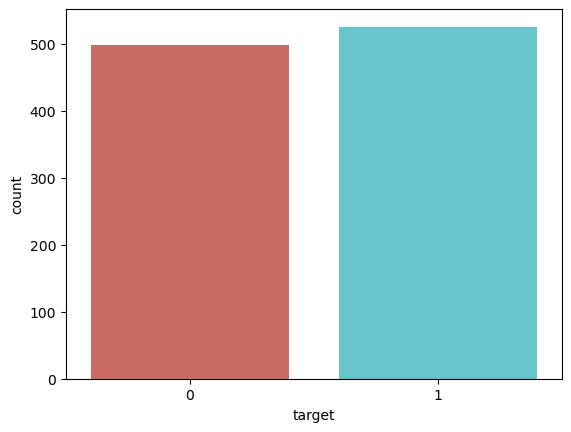

<Figure size 640x480 with 0 Axes>

In [30]:
sns.countplot(x='target', data = df, palette='hls')
plt.show()
plt.savefig('count_plot')

We can see that we have a perfect balanced dataset here. If not, we will need to use SMOTE algorithm(Synthetic Minority Oversampling Technique) to turn it into a balanced one.

### Distribution of Categorical Variables

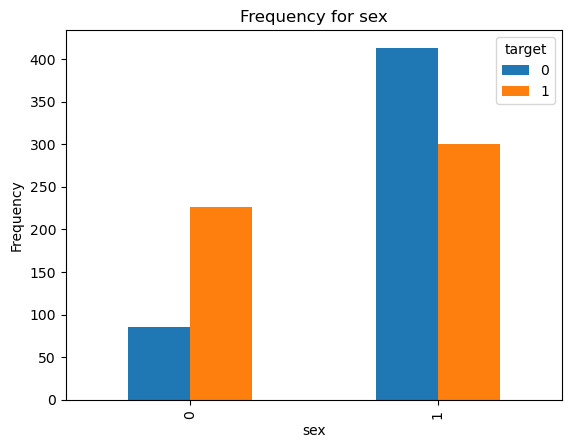

In [31]:
%matplotlib inline
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.title('Frequency for sex')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.savefig('disease_fre_sex')

The frequency of heart disease depends a great deal on the sex. Thus, the sex can be a good predictor of the outcome variable.

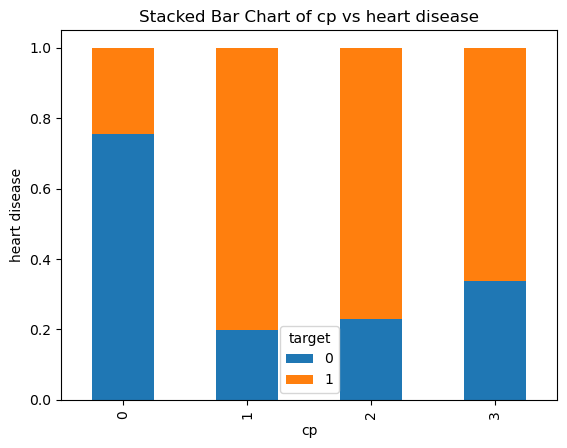

In [32]:
table=pd.crosstab(df.cp,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of cp vs heart disease')
plt.xlabel('cp')
plt.ylabel('heart disease')
plt.savefig('cp_vs_heart_disease')
# good variable

cp seems a good predictor of the outcome variable.

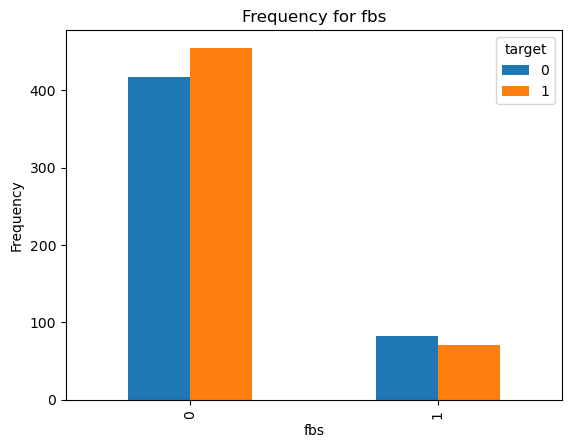

In [33]:
%matplotlib inline
pd.crosstab(df.fbs,df.target).plot(kind='bar')
plt.title('Frequency for fbs')
plt.xlabel('fbs')
plt.ylabel('Frequency')
plt.savefig('disease_fre_fbs')
# good variable

fbs seems a good predictor of the outcome variable.

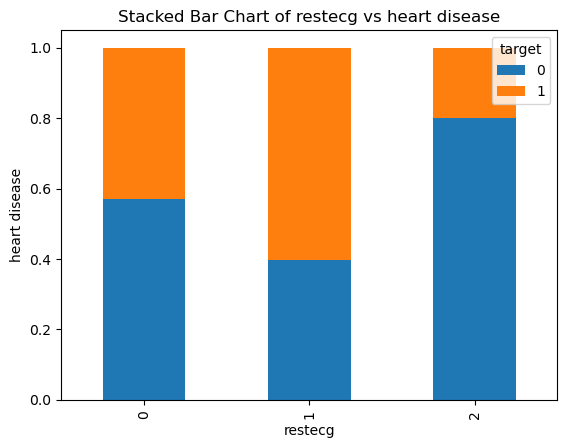

In [34]:
table=pd.crosstab(df.restecg,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of restecg vs heart disease')
plt.xlabel('restecg')
plt.ylabel('heart disease')
plt.savefig('restecg_vs_heart_disease')
# good variable

restecg seems a good predictor of the outcome variable.

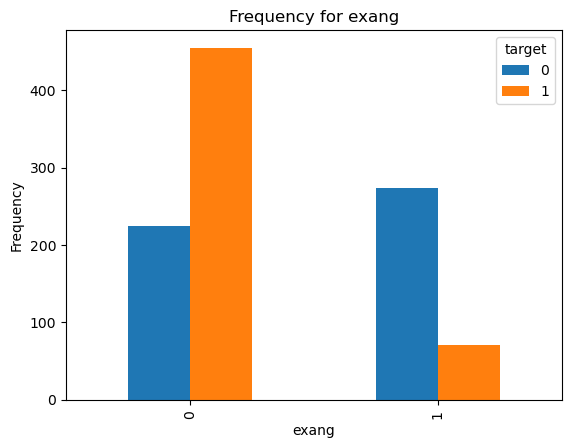

In [35]:
%matplotlib inline
pd.crosstab(df.exang,df.target).plot(kind='bar')
plt.title('Frequency for exang')
plt.xlabel('exang')
plt.ylabel('Frequency')
plt.savefig('disease_fre_exang')
# good variable

exang seems a good predictor of the outcome variable.

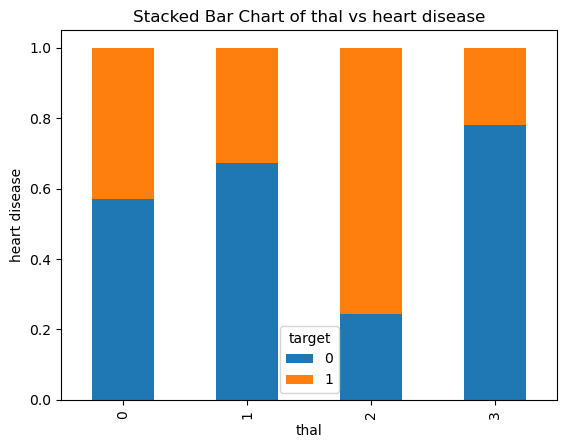

In [36]:
table=pd.crosstab(df.thal,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of thal vs heart disease')
plt.xlabel('thal')
plt.ylabel('heart disease')
plt.savefig('thal_vs_heart_disease')
# good variable

thal seems a good predictor of the outcome variable.

### Distribution of Continuous Variables

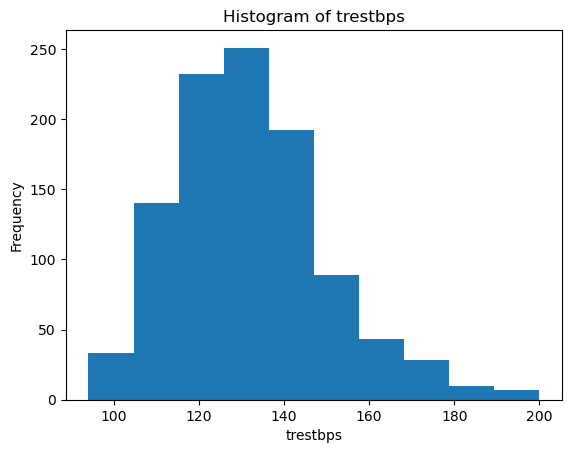

In [37]:
# draw the histgram of the trestbps
plt.hist(df['trestbps'], bins=10)
plt.title('Histogram of trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()

Most of the people in this dataset are in the trestbps range of 120-130. The data is normally distributed so trestbps might be a good feature of the outcome variable.

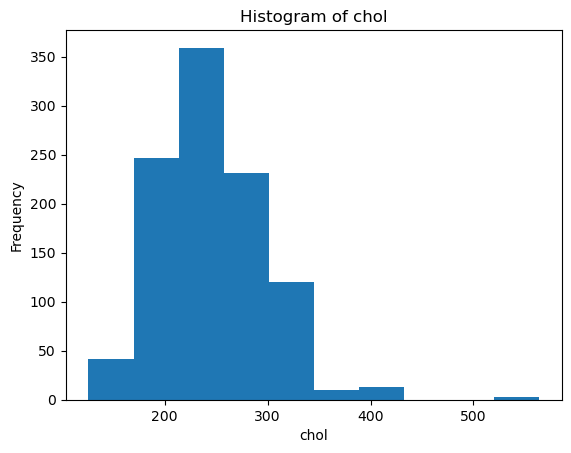

In [38]:
plt.hist(df['chol'], bins=10)
plt.title('Histogram of chol')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

chol might be a good feature of the outcome variable.

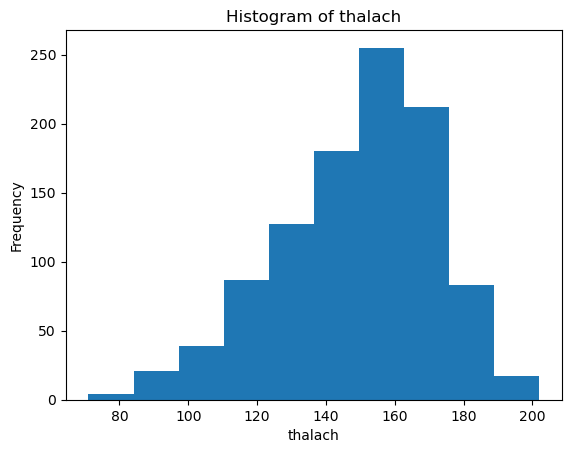

In [39]:
plt.hist(df['thalach'], bins=10)
plt.title('Histogram of thalach')
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.show()

thalach might be a good feature of the outcome variable.

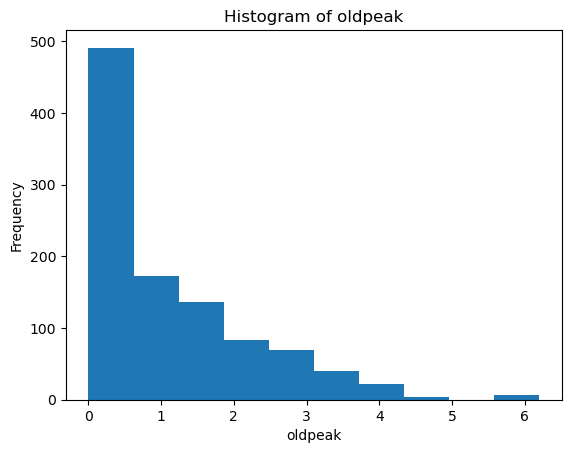

In [40]:
plt.hist(df['oldpeak'], bins=10)
plt.title('Histogram of oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

Although the oldpeak is not normally distributed, it can still be a useful feature.

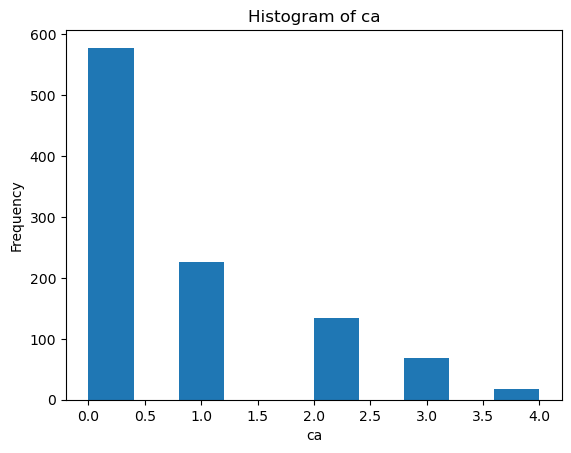

In [41]:
plt.hist(df['ca'], bins=10)
plt.title('Histogram of ca')
plt.xlabel('ca')
plt.ylabel('Frequency')
plt.show()

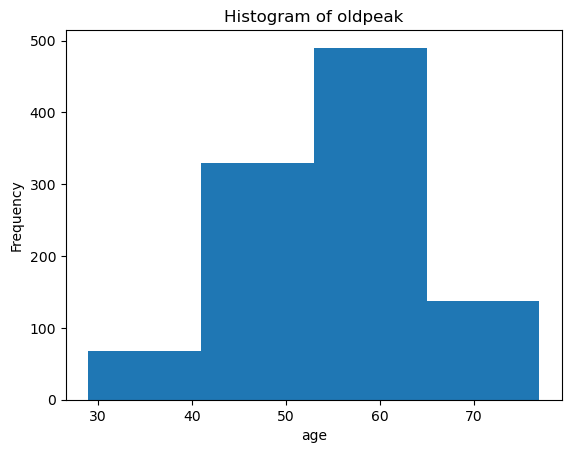

In [42]:
plt.hist(df['age'], bins=4)
plt.title('Histogram of oldpeak')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

oldpeak might be a good feature of the outcome variable.

Perform PCA

In [43]:
# Step 1: Find the covariance matrix.  Hint: data.shape[0] is the number of samples
D = np.dot(X.transpose(),X)/X.shape[0]

In [44]:
D

array([[ 1.        , -0.1032403 , -0.07196627,  0.27112141,  0.21982253,
         0.12124348, -0.13269617, -0.39022708,  0.08816338,  0.20813668,
        -0.16910511,  0.27155053,  0.07229745],
       [-0.1032403 ,  1.        , -0.04111909, -0.07897377, -0.19825787,
         0.02720046, -0.05511721, -0.04936524,  0.13915681,  0.08468656,
        -0.02666629,  0.11172891,  0.19842425],
       [-0.07196627, -0.04111909,  1.        ,  0.03817742, -0.08164102,
         0.07929359,  0.04358061,  0.30683928, -0.40151271, -0.17473348,
         0.13163278, -0.17620647, -0.16334148],
       [ 0.27112141, -0.07897377,  0.03817742,  1.        ,  0.12797743,
         0.18176662, -0.12379409, -0.03926407,  0.06119697,  0.18743411,
        -0.12044531,  0.10455372,  0.05927618],
       [ 0.21982253, -0.19825787, -0.08164102,  0.12797743,  1.        ,
         0.02691716, -0.14741024, -0.02177209,  0.06738223,  0.06488031,
        -0.01424787,  0.07425934,  0.10024418],
       [ 0.12124348,  0.027200

In [45]:
# Step 2: Find the eigenvalues and eigenvectors and plot them
L, P = np.linalg.eigh(D)
L = L[::-1]
P = P[:,::-1]

eigenvalue_plot = figure(title='Eigenvalues')
eigenvalue_plot.circle(x=range(L.shape[0]),y=L)
eigenvalue_plot.line(x=range(L.shape[0]),y=L,color='green')
show(eigenvalue_plot)

In [46]:
# Step 3: Project and plot the data
PC2 = np.dot(X, P[:,:2])
scatter_plot = figure(title='Principal Components')

scatter_plot.scatter(x=PC2[:,0],y=PC2[:,1])
show(scatter_plot)

In [47]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
for i in range(13):
    scatter_plot.line(x=[0,P[i,0]],y=[0,P[i,1]],color=Category20[13][i],line_width=3,legend_label=names[i])
scatter_plot.title.text = 'Principal Components with Loadings'
show(scatter_plot)

## Linear Regression

### Check Multicollinearity

The possible presence of multicollinearity will have a number of potentially serious effects on the least-square estimation of the linear regression coefficients. So we use eigensystem analysis of $X^{T}X$ to measure the extent of multicollinearity in the data. To be specific, we examine the condition number of $X^{T}X$, defined as the ratio of the largest and the smallest eigenvalue of $X^{T}X$.

In [17]:
D = np.dot(X.transpose(),X)/(X.shape[0])

In [18]:
L, P = np.linalg.eigh(D)
L

array([0.3691024 , 0.43165455, 0.52225597, 0.63045883, 0.72593848,
       0.76798511, 0.87643207, 0.97234398, 0.99917026, 1.16922513,
       1.20098994, 1.55635467, 2.77808862])

In [19]:
condition_number = L[-1]/L[0]
condition_number

7.526606747530316

It turns out that the condition number of $X^{T}X$ is much less than 100, so we can conclude that there is no collinearity problem in our data.

### Perform Linear Regression

In [20]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
# Define LinearReg Function to perform linear regression, and return coeffcient, MSE, and Accuracy
def LinearReg(X, y, X_test, y_test):
    X = np.concatenate([X, np.ones(shape = (X.shape[0], 1))], axis=1)  # append 1 to X
    b_olse = np.dot(np.linalg.inv(np.dot(X.transpose(), X)), np.dot(X.transpose(), y))  # OLSE of the coefficients
    X_test = np.concatenate([X_test, np.ones(shape = (X_test.shape[0], 1))], axis=1)  # append 1 to X_test
    y_hat = np.dot(X_test, b_olse)  # prediction on Test
    mse = (np.sum(np.square(y_test-y_hat)))/(y_test.shape[0])
    y_pred = (y_hat>=0.5)
    accuracy = (y_pred == y_test).sum()/(y_test.shape[0])
    return b_olse, mse, accuracy

In [22]:
LinearReg(X_train, y_train, X_test, y_test)

(array([-0.01814671, -0.10517372,  0.11086007, -0.03043359, -0.02599946,
         0.00351103,  0.03483369,  0.06184815, -0.06935937, -0.08602186,
         0.03599003, -0.09112502, -0.07851291,  0.50976185]),
 0.11379692253074321,
 0.8599221789883269)

After performing Linear Regression, we can know ***MSE*** is equal to 0.1138 and ***accuracy*** is equal to 0.8599. Overall, our linear model perform well. 

We notice ***Sex, CP, thalach, exang, oldpeak, ca, thal*** have larger coefficient compared to the others. These variables play the sinificant role in predciting heart disease.

In [23]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [24]:
regr.coef_

array([-0.01814671, -0.10517372,  0.11086007, -0.03043359, -0.02599946,
        0.00351103,  0.03483369,  0.06184815, -0.06935937, -0.08602186,
        0.03599003, -0.09112502, -0.07851291])

Using Scikit-learn built-in function, we got the same result.

## Logistic Regression

In [13]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
# Perform Logistic regression by using SKlearn
L = LogisticRegression(max_iter = 10000)
L.fit(X_train,y_train)
L.score(X_test,y_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(L.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.8638


Performing Logistic regression, we got **0.8638 accuracy**, which means our model perform well.

In [15]:
y_pred = L.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 98  25]
 [ 10 124]]


The result is telling us that we have 98 True Negative, 25 False Positive, 10 False Negative, and 124 True Positive.

In [22]:
np.set_printoptions(precision = 3, suppress = True)

In [18]:
L.coef_

array([[-0.136, -0.875,  0.82 , -0.261, -0.281, -0.004,  0.309,  0.469,
        -0.474, -0.728,  0.253, -0.718, -0.573]])

We notice **Sex, CP, thalach, exang, oldpeak, ca, thal** have larger coefficient compared to the others, which means that these variables play the sinificant role in predciting heart disease. Logistic regression show the similar result with linear regression.

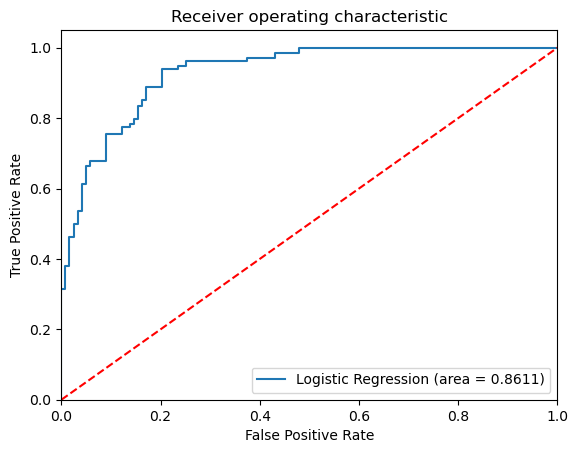

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, L.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, L.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC Curve evaluates the performance of a binary classification model and provides insight into the trade-off between TPR and FPR at different classification thresholds. Logistic Regression Model can achieve relatively high TPR with a relatively low FPR.

## Naive Bayes Classifier

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Using Discrete Features

In [62]:
# Choose Discrete Features
# These catagorical data are either Binary or Ordinal types. So, we don't need to do One-hot Encoding
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal','slope','ca']
X = df[categorical_features].values
y = df['target'].values

In [63]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [64]:
# Perform Multinomial Naive Bayes
M = MultinomialNB().fit(X_train, y_train)

In [65]:
y_pred = M.predict(X_test)
print("Multinomial Naive Bayes\n Total number of Samples： %d \n Number of wrong Predictions : %d" % (X_test.shape[0],(y_pred != y_test).sum()))

Multinomial Naive Bayes
 Total number of Samples： 257 
 Number of wrong Predictions : 38


In [66]:
M.score(X_test,y_test)

0.8521400778210116

Multinomial Naive Bayes show **0.8521 accuracy**, which shows this model perform well.

### Using "Continuous" Features

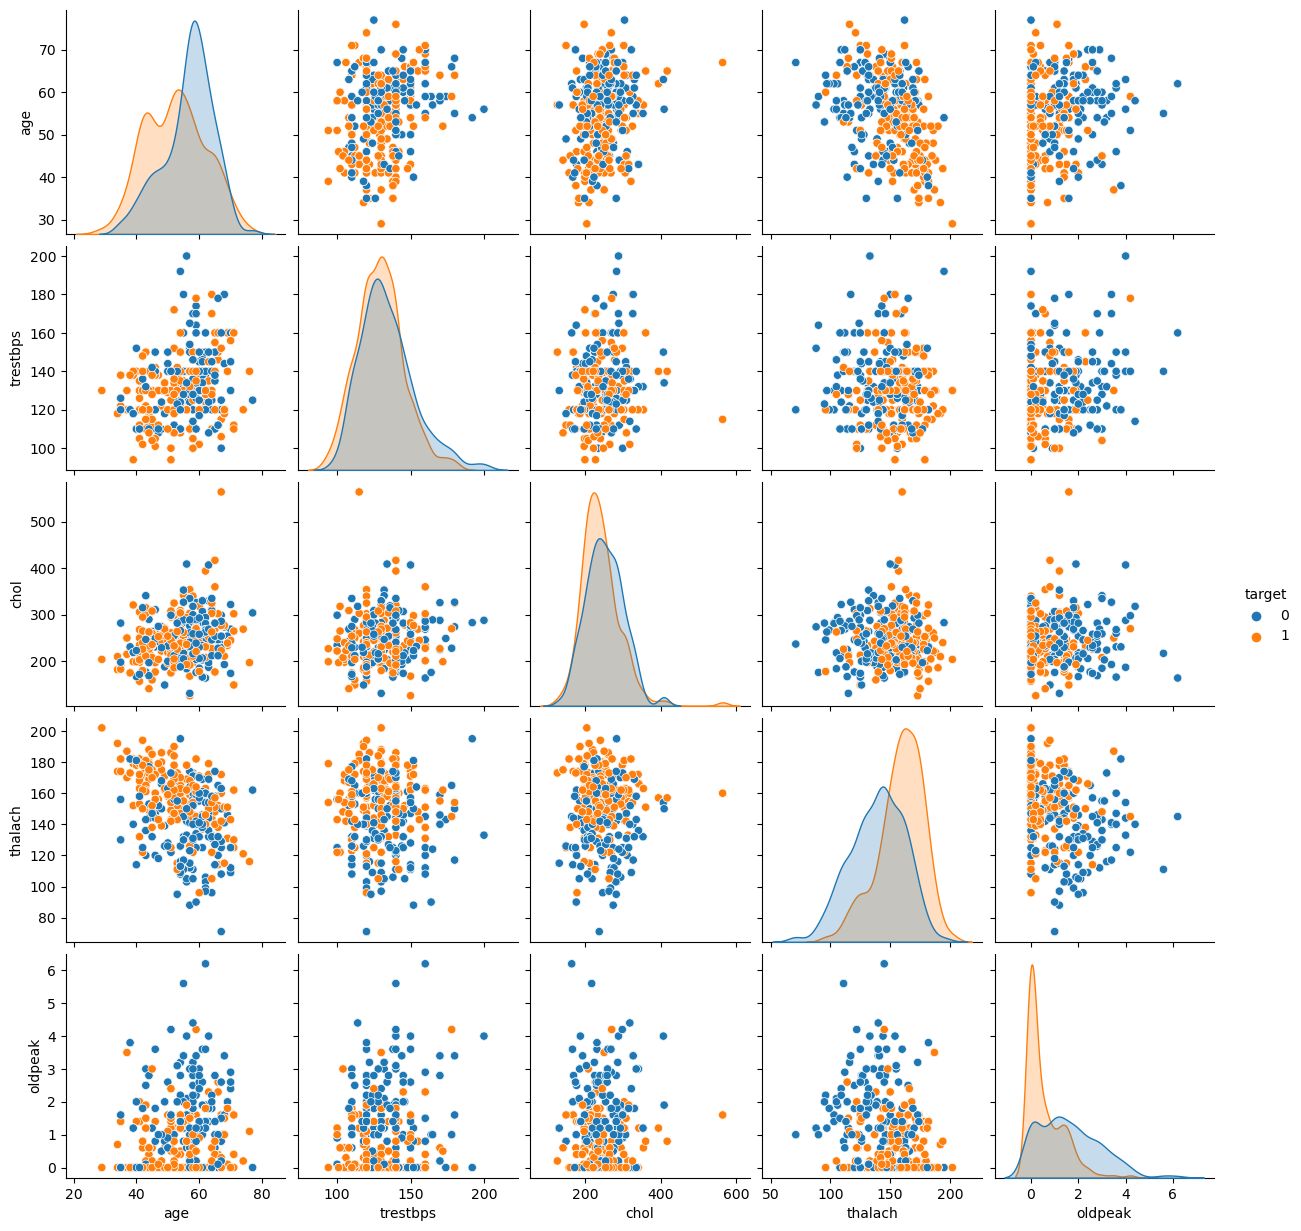

In [56]:
# Choose Continuous Features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
label_column = 'target'
df_subset = df[continuous_features + [label_column]]
sns.pairplot(data=df_subset, hue=label_column)

Based on the above pairplot, each continuous variables have approximately normal distribution. Each pair of variables doesn't have clear linear relationship. So, we can use Gaussian Naive Bayes to do further analysis.

In [67]:
X = df[continuous_features].values
y = df['target'].values

# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [68]:
# Perform Gaussian Naive Bayes
G = GaussianNB().fit(X_train, y_train)

In [69]:
y_pred = G.predict(X_test)
print("Gaussian Naive Bayes\n Total number of Samples： %d \n Number of wrong Predictions : %d" % (X_test.shape[0],(y_pred != y_test).sum()))

Gaussian Naive Bayes
 Total number of Samples： 257 
 Number of wrong Predictions : 59


In [60]:
G.score(X_test,y_test)

0.7704280155642024

Gaussian Naive Bayes show **0.7704 accuracy**, which shows this model perform well.

## Conclusion

Overall, all three models have good performance. Compared to Linear regression and Naive Bayes Claasifier, Logistic Regression have better performance, which means it is better to use logistic to deal with this kind of problem. We know there are some better algorithms to use, but we don't study right now. We can try more model to get better result in the future.

Based on our analysis, we notice **Sex, CP, thalach, exang, oldpeak, ca, thal** have larger coefficient, which means that these variables play the sinificant role in predciting heart disease. 

| Feature    | Coefficient |
| -------- | ------- |
| Sex  | -0.875    |
| CP | 0.82     |
| thalach    | 0.469    |
| exang  | -0.474    |
| oldpeak | -0.728     |
| ca    | -0.718    |
| thal    | -0.573    |

According to the coefficients that genereated from logistic regression, we can conclude:
  1. Male is more likely to get heart disease than female.
  2. The more chest pain you have, the more likely have a heart disease.
  3. Higher maximum heart rate, the less likely have a heart disease.
  4. if you have exercise induced angina, you are more likely have a heart disease.
  5. Higher ST depression induced by exercise relative to rest, the more likely have a heart disease.
  6. The more number of major vessels colored by flourosopy, the more likely have a heart disease.
  7. if you have thalassemia, especially reverserable defect, you are likely to have a heart disease.

Every year, there are appromiately 647,000 Americans died from heart disease, which is one of the most deadly diseases that people don't notice. Thus, we recommend people to care more about these symptoms. Early detection and treatment can prevent people from dying of heart disease.